In [2]:
!git clone https://github.com/NicoEssi/Undercomplete_Autoencoder.git

Cloning into 'Undercomplete_Autoencoder'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 47 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
training_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_trn.csv", header = None)
training_set0 = np.array(training_set0, dtype = "int")

training_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_trn.csv", header = None)
#training_set1 = np.array(training_set1, dtype = "int")

test_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_tst.csv", header = None)
test_set0 = np.array(test_set0, dtype = "int")

test_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_tst.csv", header = None)
#test_set1 = np.array(test_set1, dtype = "int")

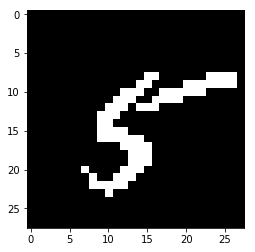

In [7]:
def displayMNIST(data, index):
    display_number = data[index, :]
    display_number = display_number.reshape([28, 28])
    plt.imshow(display_number, cmap='gray')
    plt.show
    
def displayMNIST_alt(image):
    image = image.reshape([28,28])
    plt.imshow(image, cmap='gray')
    plt.show

displayMNIST(training_set0, 135) # test 0
#displayMNIST(test_set0, 137) # test 0

In [0]:
trn_data = torch.cuda.FloatTensor(training_set0)
tst_data = torch.cuda.FloatTensor(test_set0)

In [0]:
class autoenc(nn.Module):
    def __init__(self, nodes = 100):
        super(autoenc, self).__init__() # inheritence
        self.full_connection0 = nn.Linear(784, nodes) # encoding weights
        self.full_connection1 = nn.Linear(nodes, 784) # decoding weights
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.full_connection0(x)) # input encoding
        x = self.full_connection1(x) # output decoding
        return x

In [0]:
model = autoenc().cuda() #.cuda() - to move to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),
                          lr = 1e-3)



In [0]:
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)

In [12]:
loss_epoch1 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        optimizer.zero_grad()
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch1.append(loss_calculated)

epoch: 1   loss: 0.26416641729559004
epoch: 2   loss: 0.20822565838986667
epoch: 3   loss: 0.18364267323784614
epoch: 4   loss: 0.16861060338461858
epoch: 5   loss: 0.15873745788285182
epoch: 6   loss: 0.15167549664875413
epoch: 7   loss: 0.14639331169850675
epoch: 8   loss: 0.1423617478043738
epoch: 9   loss: 0.1392763089103558
epoch: 10   loss: 0.13692102195435527
epoch: 11   loss: 0.1351197605442789
epoch: 12   loss: 0.13372909115365358
epoch: 13   loss: 0.13263808561055457
epoch: 14   loss: 0.1317644878739324
epoch: 15   loss: 0.131049709513458
epoch: 16   loss: 0.13045239392585425
epoch: 17   loss: 0.1299441874133842
epoch: 18   loss: 0.12950442481752156
epoch: 19   loss: 0.1291203460288714
epoch: 20   loss: 0.1287801126128681
epoch: 21   loss: 0.12847818424015617
epoch: 22   loss: 0.12820695869330895
epoch: 23   loss: 0.1279635829684324
epoch: 24   loss: 0.12774352524594104
epoch: 25   loss: 0.12754472145995485
epoch: 26   loss: 0.12736122811354741
epoch: 27   loss: 0.12719743772

In [13]:
model2 = autoenc(nodes = 200).cuda() #.cuda() - to move to GPU
optimizer2 = optim.Adam(model2.parameters(),
                          lr = 1e-3)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch2 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        optimizer2.zero_grad()
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model2(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer2.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch2.append(loss_calculated)



epoch: 1   loss: 0.24639821201103176
epoch: 2   loss: 0.18283783652752306
epoch: 3   loss: 0.15848541785987014
epoch: 4   loss: 0.14416645489084587
epoch: 5   loss: 0.13436850479907367
epoch: 6   loss: 0.1269424455733662
epoch: 7   loss: 0.12102176782771375
epoch: 8   loss: 0.11613796598640201
epoch: 9   loss: 0.11204931586424295
epoch: 10   loss: 0.10863638720863054
epoch: 11   loss: 0.10581365548830127
epoch: 12   loss: 0.10350275059999896
epoch: 13   loss: 0.10163418877795788
epoch: 14   loss: 0.10013493933526746
epoch: 15   loss: 0.09893428378803375
epoch: 16   loss: 0.09796879146034622
epoch: 17   loss: 0.09717279472957538
epoch: 18   loss: 0.09650842520123161
epoch: 19   loss: 0.09595262083551642
epoch: 20   loss: 0.09545340200376058
epoch: 21   loss: 0.09502876147550887
epoch: 22   loss: 0.09464033011637589
epoch: 23   loss: 0.09430003687171869
epoch: 24   loss: 0.0939868081833849
epoch: 25   loss: 0.09371032674927662
epoch: 26   loss: 0.09344832925724685
epoch: 27   loss: 0.093

In [14]:
model3 = autoenc(nodes = 400).cuda() #.cuda() - to move to GPU
optimizer3 = optim.Adam(model3.parameters(),
                          lr = 1e-3)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch3 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        optimizer3.zero_grad()
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model3(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer3.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch3.append(loss_calculated)


epoch: 1   loss: 0.23229419733218712
epoch: 2   loss: 0.16440973703010148
epoch: 3   loss: 0.14050058181160255
epoch: 4   loss: 0.12583713432024052
epoch: 5   loss: 0.11476698686334054
epoch: 6   loss: 0.10551329318282725
epoch: 7   loss: 0.09732046852090609
epoch: 8   loss: 0.08991479014174177
epoch: 9   loss: 0.08320668168768908
epoch: 10   loss: 0.07715953253897233
epoch: 11   loss: 0.0717800878658087
epoch: 12   loss: 0.06703139255106878
epoch: 13   loss: 0.06278299321194784
epoch: 14   loss: 0.05901002037042137
epoch: 15   loss: 0.055667691589310564
epoch: 16   loss: 0.05275764804597415
epoch: 17   loss: 0.05027526087776323
epoch: 18   loss: 0.04820345026565799
epoch: 19   loss: 0.04646838113036235
epoch: 20   loss: 0.044905712789040396
epoch: 21   loss: 0.04392768087955238
epoch: 22   loss: 0.04277881506908221
epoch: 23   loss: 0.04175870153272464
epoch: 24   loss: 0.04109562359737572
epoch: 25   loss: 0.04045516591552846
epoch: 26   loss: 0.040172833941090856
epoch: 27   loss: 0

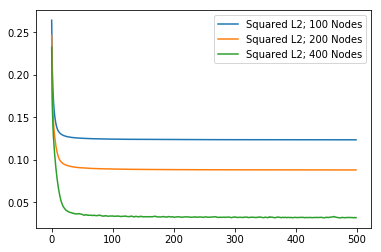

In [15]:
plt.plot(loss_epoch1, label = "Squared L2; 100 Nodes")
plt.plot(loss_epoch2, label = "Squared L2; 200 Nodes")
plt.plot(loss_epoch3, label = "Squared L2; 400 Nodes")
plt.legend()
plt.show()

In [15]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model(input)
    outputs.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 100 ; loss: ' + str(loss_calculated))


n: 100 ; loss: 0.12439036175459137


In [16]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs2 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model2(input)
    outputs2.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 200 ; loss: ' + str(loss_calculated))


n: 200 ; loss: 0.09035018723254738


In [17]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs3 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model3(input)
    outputs3.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 400 ; loss: ' + str(loss_calculated))


n: 400 ; loss: 0.03231882695511303


In [0]:
# 9 - Preprocessing for visualizing reconstructions from each model

# 9.0 - From input
outputs0_array = []
outputs0_array.append(test_set0[3])     # add 1
outputs0_array.append(test_set0[7])     # add 2
outputs0_array.append(test_set0[0])     # add 3
outputs0_array.append(test_set0[2])     # add 4
outputs0_array.append(test_set0[1])     # add 5
outputs0_array.append(test_set0[14])    # add 6
outputs0_array.append(test_set0[8])     # add 7
outputs0_array.append(test_set0[6])     # add 8
outputs0_array.append(test_set0[5])     # add 9
outputs0_array.append(test_set0[18])    # add 0

# 9.1 - From model 1
outputs_array = []
outputs_array.append(outputs[3].cpu().detach().numpy())     # add 1
outputs_array.append(outputs[7].cpu().detach().numpy())     # add 2
outputs_array.append(outputs[0].cpu().detach().numpy())     # add 3
outputs_array.append(outputs[2].cpu().detach().numpy())     # add 4
outputs_array.append(outputs[1].cpu().detach().numpy())     # add 5
outputs_array.append(outputs[14].cpu().detach().numpy())    # add 6
outputs_array.append(outputs[8].cpu().detach().numpy())     # add 7
outputs_array.append(outputs[6].cpu().detach().numpy())     # add 8
outputs_array.append(outputs[5].cpu().detach().numpy())     # add 9
outputs_array.append(outputs[18].cpu().detach().numpy())    # add 0

# 9.2 - From model 2
outputs2_array = []
outputs2_array.append(outputs2[3].cpu().detach().numpy())     # add 1
outputs2_array.append(outputs2[7].cpu().detach().numpy())     # add 2
outputs2_array.append(outputs2[0].cpu().detach().numpy())     # add 3
outputs2_array.append(outputs2[2].cpu().detach().numpy())     # add 4
outputs2_array.append(outputs2[1].cpu().detach().numpy())     # add 5
outputs2_array.append(outputs2[14].cpu().detach().numpy())    # add 6
outputs2_array.append(outputs2[8].cpu().detach().numpy())     # add 7
outputs2_array.append(outputs2[6].cpu().detach().numpy())     # add 8
outputs2_array.append(outputs2[5].cpu().detach().numpy())     # add 9
outputs2_array.append(outputs2[18].cpu().detach().numpy())    # add 0

# 9.3 - From model 3
outputs3_array = []
outputs3_array.append(outputs3[3].cpu().detach().numpy())     # add 1
outputs3_array.append(outputs3[7].cpu().detach().numpy())     # add 2
outputs3_array.append(outputs3[0].cpu().detach().numpy())     # add 3
outputs3_array.append(outputs3[2].cpu().detach().numpy())     # add 4
outputs3_array.append(outputs3[1].cpu().detach().numpy())     # add 5
outputs3_array.append(outputs3[14].cpu().detach().numpy())    # add 6
outputs3_array.append(outputs3[8].cpu().detach().numpy())     # add 7
outputs3_array.append(outputs3[6].cpu().detach().numpy())     # add 8
outputs3_array.append(outputs3[5].cpu().detach().numpy())     # add 9
outputs3_array.append(outputs3[18].cpu().detach().numpy())    # add 0

In [1]:
img_recon = []
for ind in range(10):
    img_rec = np.concatenate((outputs0_array[ind].reshape([28, 28]), 
                              outputs_array[ind].reshape([28, 28]),
                              outputs2_array[ind].reshape([28, 28]),
                              outputs3_array[ind].reshape([28, 28])), axis = 1)
    plt.imshow(img_rec, cmap = "gray")
    img_recon.append(img_rec)

img_complete = img_recon[0]
for app in range(9):
    img_complete = np.concatenate((img_complete, img_recon[app+1]), axis = 0)
plt.imshow(img_complete)

NameError: ignored

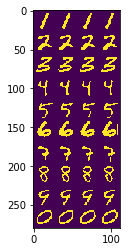

In [20]:
def binaryVis(val): # val = cutoff value
    img_complete_bin = img_complete
    img_complete_bin[img_complete_bin > val] = 1
    img_complete_bin[img_complete_bin < val] = 0
    plt.imshow(img_complete_bin)

binaryVis(0.5)


In [0]:
# 11 - Transform model weights into matrix arrays

# 11.1 - Converting weights from first model into arrays
weights11 = model.full_connection0.weight.data.cpu().detach().numpy()
weights12 = model.full_connection1.weight.data.cpu().detach().numpy()

# 11.2 - Converting weights from first model into arrays
weights21 = model2.full_connection0.weight.data.cpu().detach().numpy()
weights22 = model2.full_connection1.weight.data.cpu().detach().numpy()

# 11.3 - Converting weights from first model into arrays
weights31 = model3.full_connection0.weight.data.cpu().detach().numpy()
weights32 = model3.full_connection1.weight.data.cpu().detach().numpy()


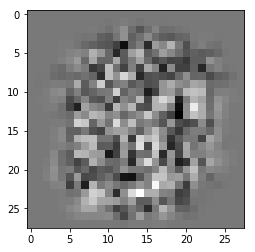

In [22]:
def displayWeights(weights, index):
    weights = weights[:, index].reshape([28, 28])
    plt.imshow(weights, cmap='gray')
    plt.show
displayWeights(weights32, 13)


28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28
28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28
28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28


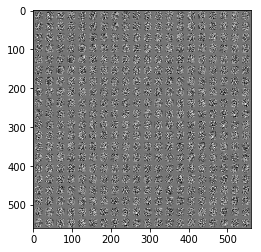

In [23]:
def displayWeights_full(weights):
    imgs_list = []
    for x_dim in range(20):
        for y_dim in range(20):
            if y_dim == 0 and x_dim == 0:
                imgs = weights[:, 0].reshape([28, 28])
            if y_dim == 0 and x_dim > 0:
                imgs_list.append(imgs)
                imgs = weights[:, x_dim].reshape([28, 28])
            if y_dim > 0:
                imgs = np.concatenate((imgs, weights[:, x_dim + y_dim].reshape([28, 28])), axis = 1)
    
    imgs_complete = imgs_list[0]
    for x_dim2 in range(19):
        print(len(imgs_complete))
        print(len(imgs_list[x_dim2]))
        imgs_complete = np.concatenate((imgs_complete, imgs_list[x_dim2]), axis = 0)
    
    plt.imshow(imgs_complete, cmap = "gray")

displayWeights_full(weights12)  # model with 100 nodes
displayWeights_full(weights22)  # model with 200 nodes
displayWeights_full(weights32)  # model with 400 nodes


In [24]:

# 13 - Calculate the sparseness of hidden layer representations

def SparsenessCalc(weights, val):
    weights_s = weights.ravel()
    weights_s[weights_s > val] = 0
    weights_s[weights_s < -val] = 0
    weights_s[weights_s > 0] = 1
    weights_s[weights_s < 0] = 1
    return sum(weights_s)/len(weights_s)

print("cutoff value: 1e-5")
print("model 1: " + str(SparsenessCalc(weights12.copy(), 1e-5)))
print("model 2: " + str(SparsenessCalc(weights22.copy(), 1e-5)))
print("model 3: " + str(SparsenessCalc(weights32.copy(), 1e-5)))
sum_sparse = SparsenessCalc(weights12.copy(), 1e-5) + SparsenessCalc(weights22.copy(), 1e-5) + SparsenessCalc(weights32.copy(), 1e-5)
print("average: " + str(sum_sparse/3))

cutoff value: 1e-5
model 1: 0.012397959183673469
model 2: 0.006014030612244898
model 3: 0.0039700255102040815
average: 0.0074606717687074825
